In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.metrics.pairwise import nan_euclidean_distances
from sklearn.impute import KNNImputer

In [9]:
df_github = pd.read_csv('E:\postgraduate\数据挖掘二学期\github-dataset\github_dataset.csv')
df_movies= pd.read_csv('E:\postgraduate\数据挖掘二学期\movies-dataset-from-piracy-website\movies_dataset.csv')

##### 加载github仓库信息和盗版电影信息两个数据文件

In [10]:
nominal_columns_github = ['repositories', 'language']
for col in nominal_columns_github:
    print(f"github数据频数统计（{col}）:")
    print(df_github[col].value_counts())
    print()

github数据频数统计（repositories）:
kameshsampath/ansible-role-rosa-demos         2
aloisdeniel/bluff                             2
antoniaandreou/github-slideshow               2
jgthms/bulma-start                            2
artkirienko/hlds-docker-dproto                2
                                             ..
WhiteHouse/CIOmanagement                      1
0xCaso/defillama-telegram-bot                 1
ethereum/blake2b-py                           1
openfoodfacts/folksonomy_mobile_experiment    1
gamemann/All_PropHealth                       1
Name: repositories, Length: 972, dtype: int64

github数据频数统计（language）:
JavaScript          253
Python              155
HTML                 72
Java                 44
CSS                  37
TypeScript           37
Dart                 36
C++                  29
Jupyter Notebook     29
Ruby                 28
C                    26
Shell                25
PHP                  16
Go                   15
Rust                 10
Swift        

##### 根据github数据库中标称属性repositories和language可能取值的频数可以得到以下信息：

##### 1.仓库数量前五的项目为：

kameshsampath/ansible-role-rosa-demos

aloisdeniel/bluff

antoniaandreou/github-slideshow

jgthms/bulma-start

artkirienko/hlds-docker-dproto

##### 2.使用最多的编程语言前五名：

JavaScript: 253

Python: 155

HTML: 72

Java: 44

CSS: 37

可以看出JavaScript和Python是最受欢迎的编程语言，有大量的仓库使用这两种语言，反映了当前项目开发中对这两种语言的热门程度。

In [154]:
nominal_columns_movies = ['appropriate_for', 'director','industry','language','title','writer']
for col in nominal_columns_movies:
    print(f"movies数据频数统计（{col}）:")
    print(df_movies[col].value_counts())
    print()

movies数据频数统计（appropriate_for）:
R                 4384
Not Rated         2142
PG-13             1968
PG                 886
TV-14              694
TV-MA              406
G                  152
Unrated            132
TV-PG              115
TV-G                99
TV-Y7               45
TV-Y                25
Approved             9
NC-17                4
TV-Y7-FV             3
Passed               3
MA-17                1
TV-13                1
Drama                1
Drama, Romance       1
18+                  1
Name: appropriate_for, dtype: int64

movies数据频数统计（director）:
Venky Atluri                                  405
Simone Stock                                  403
Xavier Manrique                               403
John Swab                                     205
Neil Jordan                                   205
                                             ... 
Agnieszka Smoczynska                            1
Dylan Thomas Ellis                              1
Sunil Thakur, Sunil Dhawa

##### 根据盗版电影数据库中标称属性appropriate_for、director、industry、language、title和writer可能取值的频数可以得到以下信息：
###### 适合观众等级（appropriate_for）：

R级别的影片数量最多，达到4384部，其次是Not Rated（2142部）和PG-13（1968部）。

可以看出R级别的影片在数据中占据主导地位。

###### 导演（director）：

Venky Atluri、Simone Stock和Xavier Manrique是导演数量最多的，分别有405部作品。

数据中涵盖了共9672位导演。

###### 电影产业（industry）：

Hollywood / English影片数量最多，达到14649部，Bollywood / Indian紧随其后，有2645部作品。

数据中还包括Tollywood、Anime / Kids等不同产业类型。

###### 语言（language）：

英语是影片中使用最广泛的语言，有12657部影片采用英语。

数据中还包括其他语言或多语言组合。

###### 电影标题（title）：

"The Girl Who Escaped: The Kara Robinson Story"、"Vaathi"和"Who Invited Charlie?"这三部影片均有402次出现，属于频率最高的影片标题。

数据中共有16572个不同的电影标题。

###### 编剧（writer）：

Nicholas Schutt、Venky Atluri和Haley Harris是编剧数量最多的，分别有403次出现。

数据中涵盖了13603位编剧。

In [155]:
numeric_columns_github = ['stars_count', 'forks_count','issues_count','pull_requests','contributors']
for col in numeric_columns_github:
    print(f"5数概括（{col}）:")
    print(df_github[col].describe())
    print(f"缺失值个数: {df_github[col].isnull().sum()}")
    print()

5数概括（stars_count）:
count    1052.000000
mean       81.976236
std       170.403116
min         0.000000
25%         1.000000
50%        12.000000
75%        65.250000
max       995.000000
Name: stars_count, dtype: float64
缺失值个数: 0

5数概括（forks_count）:
count    1052.000000
mean       53.884981
std       127.699729
min         0.000000
25%         1.000000
50%         6.000000
75%        38.250000
max       973.000000
Name: forks_count, dtype: float64
缺失值个数: 0

5数概括（issues_count）:
count    1052.000000
mean        8.656844
std        32.445154
min         1.000000
25%         1.000000
50%         2.000000
75%         6.000000
max       612.000000
Name: issues_count, dtype: float64
缺失值个数: 0

5数概括（pull_requests）:
count    1052.000000
mean        4.374525
std        27.913732
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max       567.000000
Name: pull_requests, dtype: float64
缺失值个数: 0

5数概括（contributors）:
count    1052.000000
mean        8.364068
std     

##### 根据github仓库数据库数值属性的5数概括，可以得出以下结论：

stars_count（星标数）的平均值为81.98，标准差为170.40，说明这些仓库的星标数波动较大。25%的仓库有不超过1个星标，50%的仓库有不超过12个星标，而75%的仓库有不超过65.25个星标。最高星标数为995个。

forks_count（派生数）的平均值为53.88，标准差为127.70。25%的仓库有不超过1个派生，50%的仓库有不超过6个派生，而75%的仓库有不超过38.25个派生。最高派生数为973个。

issues_count（问题数）的平均值为8.66，标准差为32.45。25%的仓库有不超过1个问题，50%的仓库有不超过2个问题，而75%的仓库有不超过6个问题。最高问题数为612个。

pull_requests（拉取请求数）的平均值为4.37，标准差为27.91。25%的仓库有不超过0个拉取请求，50%的仓库有不超过0个拉取请求，而75%的仓库有不超过2个拉取请求。最高拉取请求数为567个。

contributors（贡献者数）的平均值为8.36，标准差为37.51。25%的仓库有不超过0个贡献者，50%的仓库有不超过2个贡献者，而75%的仓库有不超过4个贡献者。最高贡献者数为658个。

综合来看，这些仓库的星标数、派生数、问题数、拉取请求数和贡献者数都呈现出一定的偏态分布，且存在一定程度的波动。

In [11]:
# 自定义函数将时间字符串转换为数值
def convert_to_minutes(time_str):
    if not isinstance(time_str, str):
        return float(time_str)

    if pd.isnull(time_str):
        return np.nan
    
    hours = 0
    minutes = 0
    if 'h' in time_str:
        hours = int(time_str.split('h')[0])
        time_str = time_str.split('h')[1].strip()
    if 'min' in time_str:
        minutes = int(time_str.split('min')[0])
    
    return 60 * hours + minutes

df_movies['run_time'] = df_movies['run_time'].apply(convert_to_minutes)

# 将int转为float，避免后面compare判定为不一致
for col in df_movies.select_dtypes(include=['int']).columns:
    df_movies[col] = df_movies[col].astype(float)

In [12]:
numeric_columns_moives = ['IMDb-rating', 'downloads','run_time','views']


for col in numeric_columns_moives:
    print(f"5数概括（{col}）:")
    if df_movies[col].dtype == object:
        # 尝试将非数值的值转换为数值，不能转换的设为NaN，防止把1,234读为文本
        df_movies[col] = pd.to_numeric(df_movies[col].str.replace(',', ''), errors='coerce')
    # 输出数值概括
    print(df_movies[col].describe())
    # 输出缺失值个数
    print(f"缺失值个数: {df_movies[col].isnull().sum()}\n")


5数概括（IMDb-rating）:
count    19707.000000
mean         5.762151
std          1.374041
min          1.100000
25%          4.800000
50%          5.700000
75%          6.600000
max          9.900000
Name: IMDb-rating, dtype: float64
缺失值个数: 841

5数概括（downloads）:
count     20547.000000
mean      10795.238916
std       23716.181987
min           0.000000
25%         855.500000
50%        2716.000000
75%       10070.000000
max      391272.000000
Name: downloads, dtype: float64
缺失值个数: 1

5数概括（run_time）:
count    18780.000000
mean        28.227157
std         45.030538
min          0.000000
25%          0.000000
50%          0.000000
75%         84.000000
max        271.000000
Name: run_time, dtype: float64
缺失值个数: 1768

5数概括（views）:
count    2.054700e+04
mean     3.559551e+04
std      6.247242e+04
min      6.670000e+02
25%      7.571500e+03
50%      1.522200e+04
75%      3.657100e+04
max      1.638533e+06
Name: views, dtype: float64
缺失值个数: 1



##### 根据盗版电影数据库数值属性的5数概括，可以得出以下结论：

IMDb 评分的平均值约为 5.76，标准差为 1.37，最低评分为 1.1，最高评分为 9.9。数据中有 841 个缺失值。

下载量的平均值约为 10795.24，标准差为 23716.18，最小值为 0，最大值为 391272。只有 1 个缺失值。

片长的平均值约为 28.23 分钟，标准差为 45.03，最短片长为 0 分钟，最长片长为 271 分钟。数据中有 1768 个缺失值。

观看次数的平均值约为 35595.51，标准差为 62472.42，最少的观看次数为 667，最多的观看次数为 1638533。只有 1 个缺失值。

根据这些统计数据，可以初步了解电影数据集的特征，包括评分、下载量、片长和观看次数的分布情况。同时也可以看出片长和观看次数存在较多的缺失值，需要在后续分析中进行处理。

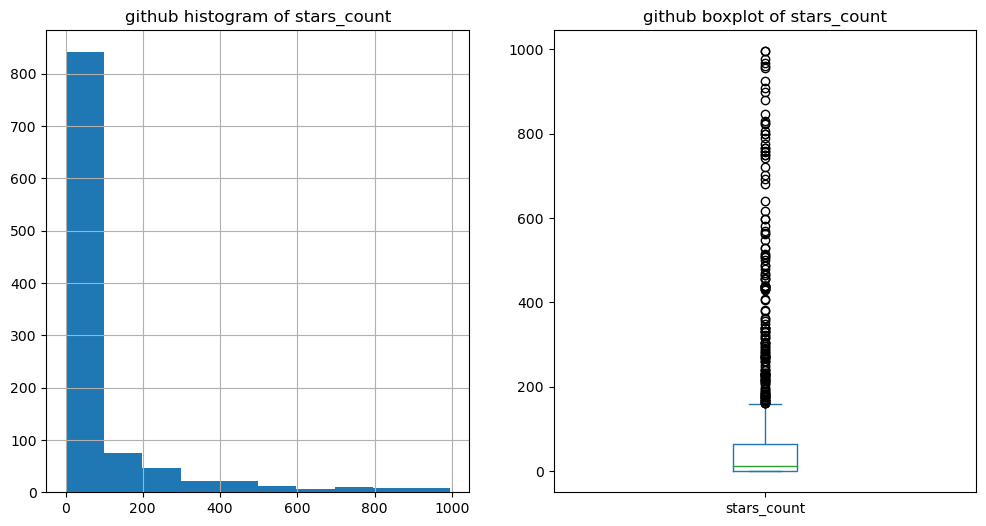

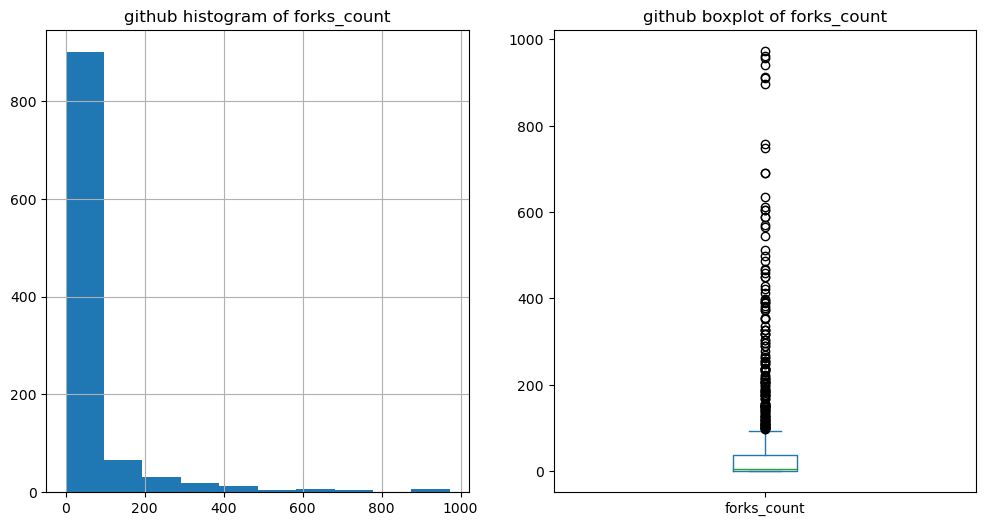

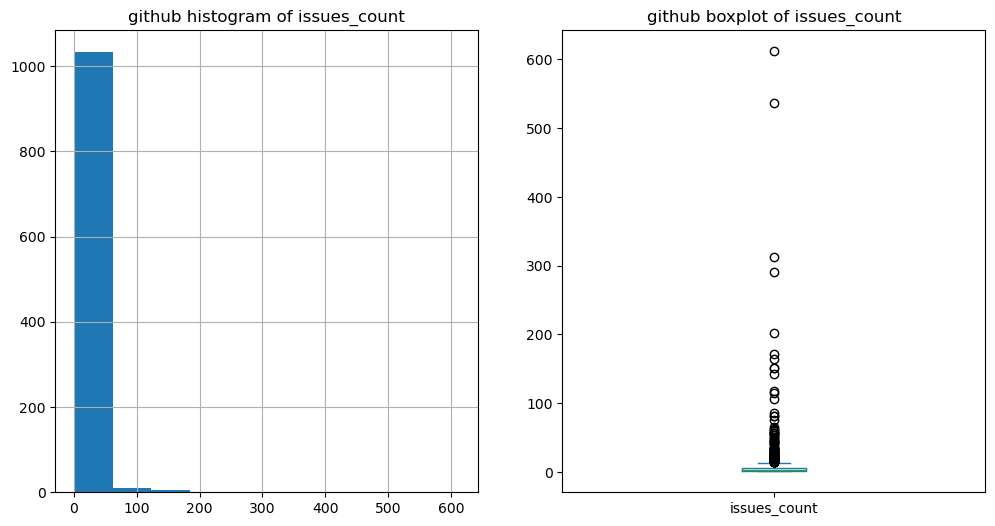

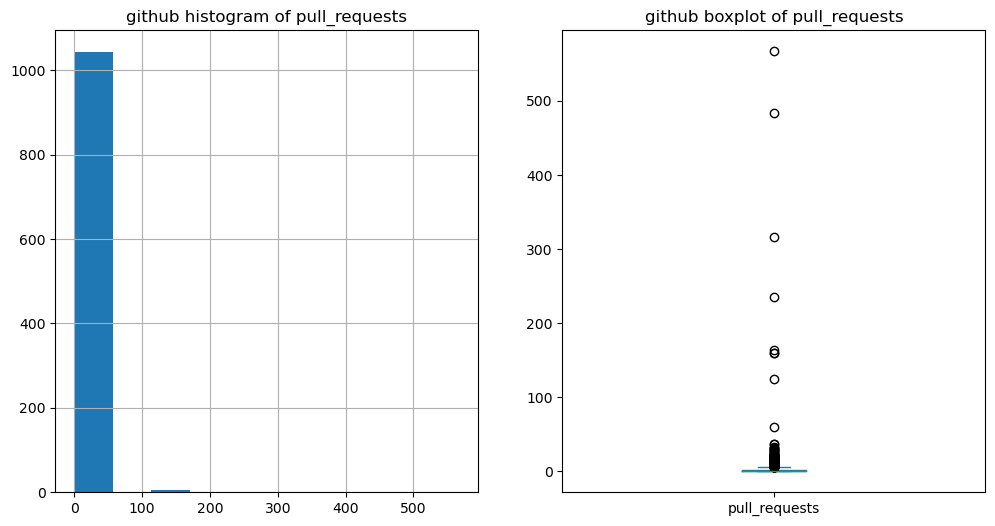

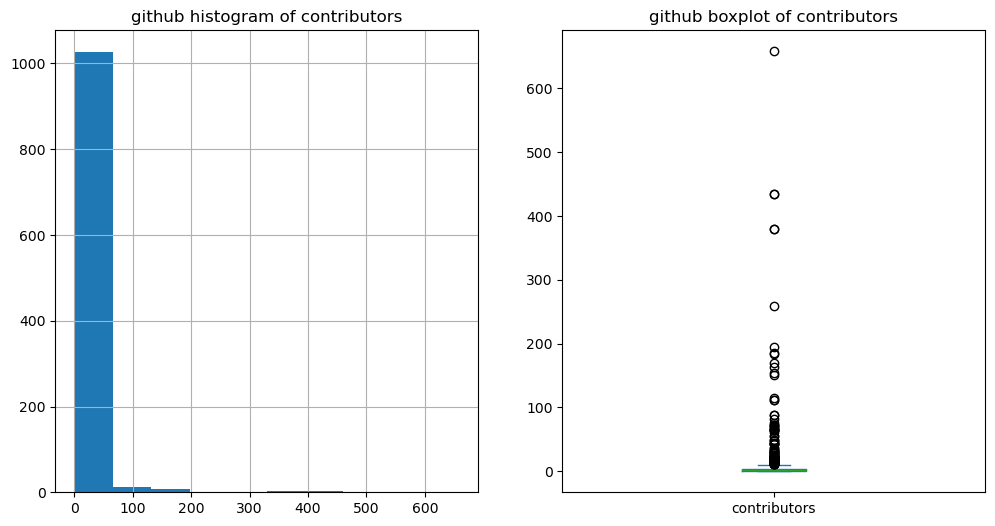

In [160]:
for col in numeric_columns_github:
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    df_github[col].hist()
    plt.title(f'github histogram of {col}')

    plt.subplot(1, 2, 2)
    df_github[col].plot(kind='box')
    plt.title(f'github boxplot of {col}')

    plt.show()

使用直方图、盒图等检查数据分布及离群点，可以看出这些仓库的星标数、派生数、问题数、拉取请求数和贡献者数都呈现出一定的偏态分布，存在一定程度的波动，离群值较多。

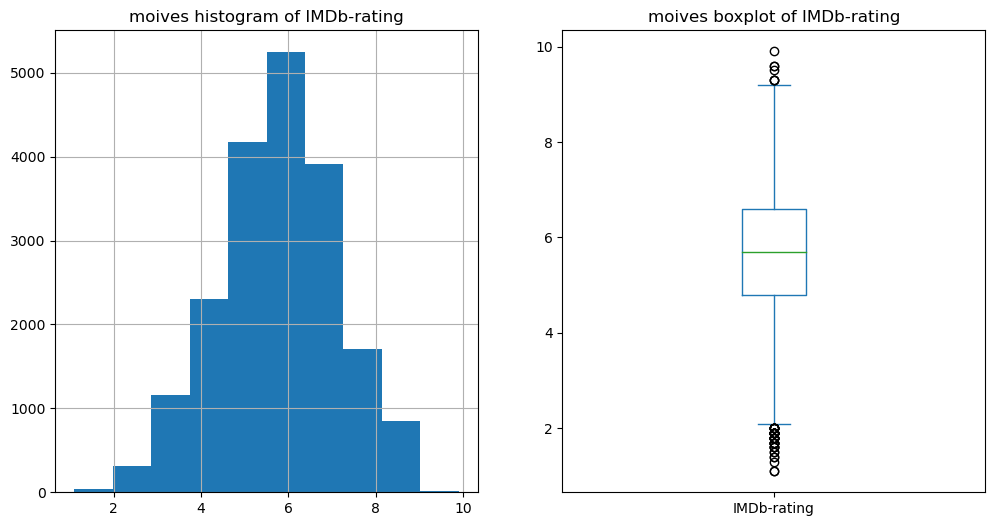

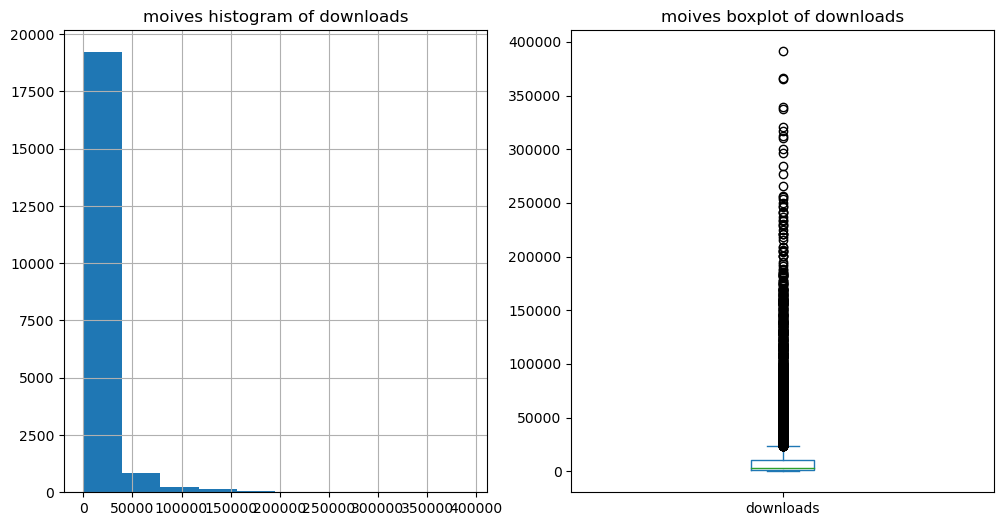

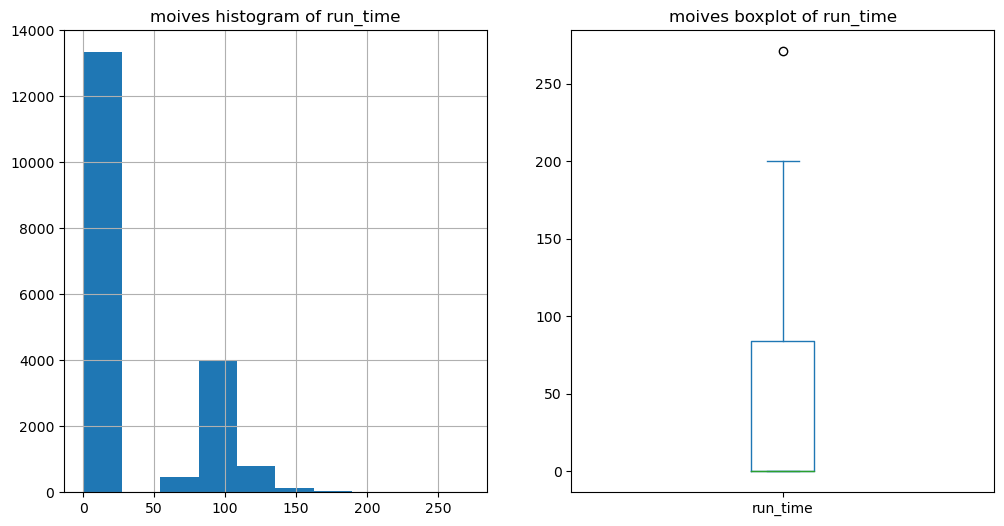

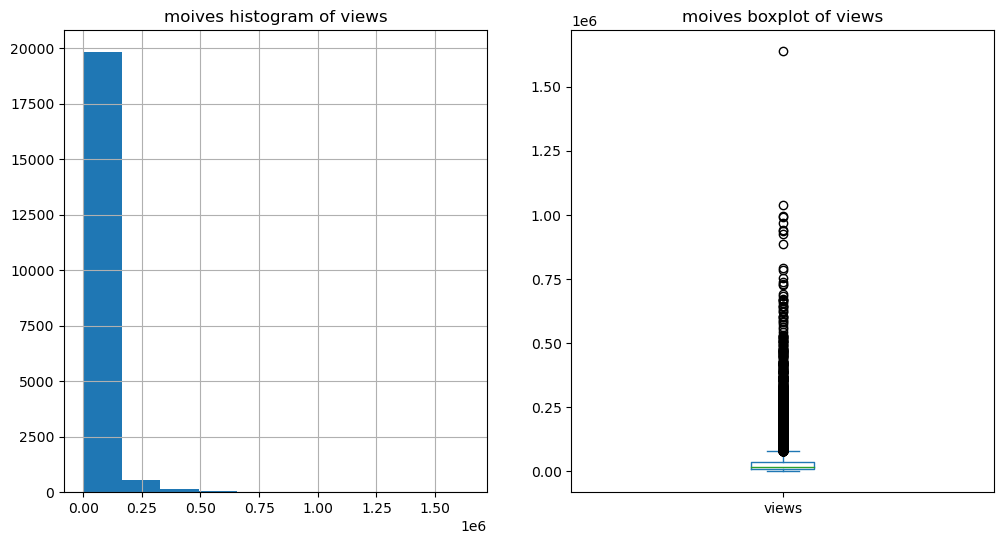

In [14]:
for col in numeric_columns_moives:
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    df_movies[col].hist()
    plt.title(f'moives histogram of {col}')

    plt.subplot(1, 2, 2)
    df_movies[col].plot(kind='box')
    plt.title(f'moives boxplot of {col}')

    plt.show()

盗版电影数据库同样也是呈现出一定的偏态分布，存在一定程度的波动，离群值较多。

In [20]:
# 将缺失部分剔除
df_github_dropped = df_github.dropna()
df_movies_dropped = df_movies.dropna()

In [16]:
# 用最高频率值来填补缺失值
imputer_mode_github = SimpleImputer(strategy='most_frequent')
df_github_filled_mode = pd.DataFrame(imputer_mode_github.fit_transform(df_github), columns=df_github.columns)

imputer_mode_movies = SimpleImputer(strategy='most_frequent')
df_movies_filled_mode = pd.DataFrame(imputer_mode_movies.fit_transform(df_movies[['appropriate_for', 'director','industry','language','title','writer']]), columns=['appropriate_for', 'director','industry','language','title','writer'])

In [17]:
# 通过属性的相关关系来填补缺失值，这里使用均值填充
imputer_mean_github = SimpleImputer(strategy='mean')
df_github_filled_mean = pd.DataFrame(imputer_mean_github.fit_transform(df_github[['stars_count', 'forks_count','issues_count','pull_requests','contributors']]), columns=['stars_count', 'forks_count','issues_count','pull_requests','contributors'])

imputer_mean_movies = SimpleImputer(strategy='mean')
df_movies_filled_mean = pd.DataFrame(imputer_mean_movies.fit_transform(df_movies[['IMDb-rating','downloads','run_time','views']]), columns=['IMDb-rating','downloads','run_time','views'])

In [18]:
# 应用KNN算法填补缺失值
imputer_similarity_github = KNNImputer(n_neighbors=2, weights="uniform")
df_github_filled_similarity  = pd.DataFrame(imputer_similarity_github.fit_transform(df_github[['stars_count', 'forks_count','issues_count','pull_requests','contributors']]), columns=['stars_count', 'forks_count','issues_count','pull_requests','contributors'])

imputer_similarity_movies = KNNImputer(n_neighbors=2, weights="uniform")
df_movies_filled_similarity  = pd.DataFrame(imputer_similarity_movies.fit_transform(df_movies[['IMDb-rating','downloads','run_time','views']]), columns=['IMDb-rating','downloads','run_time','views'])

In [26]:
# 展示处理后的数据集
# 对比新旧数据集的差异，这里以剔除缺失部分策略为例
print("github dataset\n")
print("\n将缺失部分剔除:\n", df_github_dropped)
print("\n用最高频率值来填补缺失值:\n", df_github_filled_mode)
print("\n通过属性的相关关系来填补缺失值:\n", df_github_filled_mean)
print("\n通过数据对象之间的相似性来填补缺失值:\n", df_github_filled_similarity)


print("\n原始数据集和用最高频率值来填补缺失值后的数据集对比:\n", df_github.compare(df_github_filled_mode))
print("\n原始数据集和通过属性的相关关系来填补缺失值后的数据集对比:\n", df_github[['stars_count','forks_count','issues_count','pull_requests','contributors']].compare(df_github_filled_mean[['stars_count','forks_count','issues_count','pull_requests','contributors']]))
print("\n原始数据集和通过数据对象之间的相似性来填补缺失值后的数据集对比:\n", df_github[['stars_count','forks_count','issues_count','pull_requests','contributors']].compare(df_github_filled_similarity[['stars_count','forks_count','issues_count','pull_requests','contributors']]))


github dataset


将缺失部分剔除:
                               repositories  stars_count  forks_count  \
2                           ethereum/aleth            0            0   
3                    localstack/localstack            0            0   
4                      education/classroom            0          589   
5                shobhit97/open-gpstracker            0            0   
6         donnemartin/system-design-primer            0            0   
...                                    ...          ...          ...   
1047              Tyriar/canvas-astar.dart            2            1   
1048      ankitkumar70777/github-slideshow            0            0   
1049  aitikgupta/interactive_cpu_scheduler            0            5   
1050                gwmccubbin/voting_dapp           11            5   
1051               gamemann/All_PropHealth            4            3   

      issues_count  pull_requests  contributors    language  
2              313             27           15

将缺失部分剔除：直接删除存在缺失值的数据行。

用最高频率值来填补缺失值：将缺失值用该列中出现频率最高的值进行填充。

通过属性的相关关系来填补缺失值：根据数据属性之间的相关关系，利用均值来填充缺失值。

通过数据对象之间的相似性来填补缺失值：根据数据对象之间的相似性，利用应用 KNN 算法填补缺失值。

在对比不同填补方法后的数据集时，可以看到：

用最高频率值填补缺失值和原始数据集的对比中，有145行数据被填补为出现频率最高的值（JavaScript）。

在数值属性上无缺失值所以最后两个对比为空。

综上所述，不同的填补方法会对数据集产生不同程度的影响，选择合适的填补方法需要根据具体数据特点和分析目的来决定。


In [30]:
print("movies dataset\n")
print("\n将缺失部分剔除:\n", df_movies_dropped)
print("\n用最高频率值来填补缺失值:\n", df_movies_filled_mode)
print("\n通过属性的相关关系来填补缺失值:\n", df_movies_filled_mean)
print("\n通过数据对象之间的相似性来填补缺失值:\n", df_movies_filled_similarity)

print("\n原始数据集和用最高频率值来填补缺失值后的数据集对比:\n", df_movies[['appropriate_for', 'director','writer']].compare(df_movies_filled_mode[['appropriate_for', 'director','writer']]))
print("\n原始数据集和通过属性的相关关系来填补缺失值后的数据集对比:\n", df_movies[['IMDb-rating','run_time']].compare(df_movies_filled_mean[['IMDb-rating','run_time']]))
print("\n原始数据集和通过数据对象之间的相似性来填补缺失值后的数据集对比:\n", df_movies[['IMDb-rating','run_time']].compare(df_movies_filled_similarity[['IMDb-rating','run_time']]))
# print("\n原始数据集和通过属性的相关关系来填补缺失值后的数据集对比:\n", df_movies[['IMDb-rating','run_time']].compare(df_movies_filled_mean[['IMDb-rating', 'run_time']]))
# print("\n原始数据集和通过数据对象之间的相似性来填补缺失值后的数据集对比:\n", df_movies[['IMDb-rating','run_time']].compare(df_movies_filled_similarity[['IMDb-rating','run_time']]))

movies dataset


将缺失部分剔除:
        Unnamed: 0  IMDb-rating appropriate_for                   director  \
0             0.0          4.8               R                  John Swab   
1             1.0          6.4           TV-PG                Paul Ziller   
2             2.0          5.2               R               Ben Wheatley   
7             7.0          6.5               R             Benjamin Caron   
8             8.0          6.9           PG-13                Ravi Kapoor   
...           ...          ...             ...                        ...   
20522     20522.0          7.1       Not Rated                  Biren Nag   
20525     20525.0          7.0               G               Guy Hamilton   
20533     20533.0          5.6               R  Barbara Topsøe-Rothenborg   
20537     20537.0          7.1       Not Rated                  Biren Nag   
20540     20540.0          7.0               G               Guy Hamilton   

       downloads        id             industry 

将缺失部分剔除：在剔除缺失部分后，数据量减少到9902行，但会导致丢失大量信息，特别是对于其他属性的关联性分析可能会受到影响。

用最高频率值填补缺失值:这种方法适用于标称属性数据，可以保持数据完整性，但可能会引入偏差，尤其是当缺失值较多时。

通过属性的相关关系来填补缺失值：这种方法利用属性之间的相关关系填补缺失值，可以更准确地反映数据特征，但需要确保属性之间存在一定的相关性。

通过数据对象之间的相似性来填补缺失值：这种方法根据数据对象之间的相似性来填补缺失值，使用KNN算法有效利用数据间的关联性。

综合来看，不同的填补缺失值方法适用于不同的情况和数据类型。在实际应用中，需要根据数据特点和分析目的选择合适的方法来处理缺失值，以确保分析结果的准确性和可靠性。